# Exercises XP

 ### Exercise 1 : Small Quizz

1. What is the key difference between traditional machine learning and deep learning?
2. How do artificial neural networks (ANNs) mimic the human brain?
3. Why does deep learning perform better on large datasets compared to traditional machine learning?
4. What are some challenges of deep learning, and how can they be addressed?
5. What is feature engineering, and why is it not needed in deep learning?
6. What role do hidden layers play in a deep learning model?
7. In an artificial neural network (ANN), what is the function of an activation function?
____________

1. Machine learning is more explicitly used as a means to extract knowledge from data through simpler methods such as decision trees or linear regression, while deep learning uses the more advanced methods found in artificial neural networks.

2. The ANNs mimic the human brain by using artificial neurons (nodes) connected by weighted links, used to predict an outcome.

3. Deep learning performs better on large datasets because it can automatically learn complex, hierarchical features from the data, whereas traditional machine learning often requires manual feature engineering and struggles with high-dimensional data.

4. Some challenges of deep learning are its high computational cost, high data requirement and lack of interpretability. To address these issues one can:  
  - Use cloud AI services instead of buying GPUs and optimize models using pruning, quantization, and knowledge distillation.
  - Use data augmentation, transfer learning, or unsupervised learning and use pre-trained models or synthetic data generation.
  - Use Explainable AI tools and implement attention mechanisms or hybrid models combining deep learning with interpretable techniques,
  
respectively.

5. Feature engineering is the process of manually selecting, transforming, or creating input features from raw data to improve the performance of traditional machine learning models. It is not needed in deep learning because deep neural networks can automatically learn relevant features directly from the raw data through multiple layers of abstraction.

6. Hidden layers in a deep learning model transform the input data into progressively more abstract features, allowing the model to learn complex patterns and relationships at different levels of abstraction.

7. The activaction function is used to determine whether a neuron should be “activated” (answer: yes) or not (answer: no) based on the weighted sum of inputs. It can also return a number between 0 to 1 indicating a range closer to "yes" or "no" instead of a binary answer.

### Exercise 2 : Building a Simple Perceptron Decision System

You will manually create a simple perceptron-based decision system to determine whether you should go outside based on two inputs:

    Temperature (°F)
    Rainy (Yes = 1, No = 0)

You will assign weights, compute the weighted sum, apply an activation function, and determine the final decision.

    Temperature weight = 0.6
    Rain weight = 0.4
    Bias = 2

Compute the weighted sum using the formula:

    Weighted Sum=(Temperature×0.6)+(Rain×0.4)+Bias

Apply a Step Activation Function:

    If Weighted Sum > 20, output 1 (Yes, go outside)
    If Weighted Sum ≤ 20, output 0 (No, stay inside)

1. Calculate the output for the following conditions:

    Case 1: Temperature = 70°F, Rain = 0 (No)
    
    Case 2: Temperature = 50°F, Rain = 1 (Yes)
    

2. Interpret the results: Did the perceptron suggest going outside in both cases? Why or why not?
_____________

Case 1:

In [1]:
temp = 70
rain = 0 

In [2]:
w1 = 0.6
w2 = 0.4
b = 2

In [3]:
weighted_sum = temp*w1 + rain*w2 + b

In [4]:
print(f"Weighted sum: {weighted_sum}")
if weighted_sum > 20:
    output = 1
    print("Yes, go outside")
else:
    output = 0
    pring("No, stay inside") 

Weighted sum: 44.0
Yes, go outside


Case 2:

In [5]:
temp = 50
rain = 1

In [6]:
w1 = 0.6
w2 = 0.4
b = 2

In [7]:
weighted_sum = temp*w1 + rain*w2 + b

In [8]:
print(f"Weighted sum: {weighted_sum}")
if weighted_sum > 20:
    output = 1
    print("Yes, go outside")
else:
    output = 0
    pring("No, stay inside") 

Weighted sum: 32.4
Yes, go outside


The perceptron suggested going outside in both cases because of the threshold and weight chosen for each feature.

### Exercise 3 : Building a Simple Neural Network with TensorFlow/Keras

Build a simple neural network using TensorFlow/Keras to classify handwritten digits from the MNIST dataset. The network should have:

   - One input layer.
   - One hidden layer with 128 neurons and ReLU activation.
   - One output layer with 10 neurons (for 10 classes) and softmax activation.

### Exercise 6 : Visualizing Predictions on the MNIST Dataset

Train a simple neural network using TensorFlow/Keras on the MNIST dataset. After training, visualize some of the predictions made by the model.
Dataset: The MNIST dataset is included in TensorFlow/Keras.

Here are the steps for this exercise :

   - Load the MNIST dataset
   - Normalize the data
   - One-hot encode the labels
   - Build the model
   - Compile the model
   - Train the model
   - Make predictions
   - Visualize some predictions


___________________


In [9]:
!pip install tensorflow
from tensorflow.keras.datasets import mnist


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
(x_train_data, y_train_data), (x_val_data, y_val_data) = mnist.load_data()

In [12]:
def preprocessing_function(x_new, y_new):
  x_new = tf.cast(x_new, tf.float32) / 255.0  # Normalize pixel values
  y_new = tf.cast(y_new, tf.int64)            # Convert labels to integers
  return x_new, y_new

def func_creating_dataset(xs_data, ys_data, num_classes=10):
  ys_data = tf.one_hot(ys_data, depth=num_classes)  # One-hot encode labels
  return tf.data.Dataset.from_tensor_slices((xs_data, ys_data)) \
    .map(preprocessing_function) \
    .shuffle(buffer_size=1000) \
    .batch(32)

In [13]:
My_model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),  # Flatten the input
    keras.layers.Dense(units=128, activation='relu'),                    # Hidden layer : A layer with 128 neurons and the ReLU activation function.
    keras.layers.Dense(units=10, activation='softmax')                   # Output layer :  Outputs 10 probabilities (one for each class).
])

In [14]:
My_model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
x_train_data, y_train_data = preprocessing_function(x_train_data, y_train_data)
x_val_data, y_val_data = preprocessing_function(x_val_data, y_val_data)
dataset_training = func_creating_dataset(x_train_data, y_train_data)
dataset_val = func_creating_dataset(x_val_data, y_val_data)

history = My_model.fit(
    dataset_training.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=dataset_val.repeat(), 
    validation_steps=2
)

Epoch 1/10


C:\Users\julie\Anaconda3\lib\site-packages\keras\backend.py:5535: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "categorical_crossentropy"


500/500 [==============================] - 2s 3ms/step - loss: 0.4267 - accuracy: 0.8804 - val_loss: 0.2684 - val_accuracy: 0.9531
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2351 - accuracy: 0.9324 - val_loss: 0.1278 - val_accuracy: 0.9688
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1853 - accuracy: 0.9461 - val_loss: 0.2348 - val_accuracy: 0.9219
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1510 - accuracy: 0.9548 - val_loss: 0.0680 - val_accuracy: 0.9844
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1290 - accuracy: 0.9621 - val_loss: 0.0761 - val_accuracy: 0.9844
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1189 - accuracy: 0.9644 - val_loss: 0.0654 - val_accuracy: 0.9844
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9657 - val_loss: 0.0638 - val_accuracy: 0.9844
Epoch 8/10
500/50

In [16]:
Make_predictions = My_model.predict(dataset_val)
print(Make_predictions)

313/313 [==============================] - 1s 2ms/step
[[9.5148579e-08 9.9942940e-01 2.8472205e-06 ... 4.8948603e-04
  1.8148268e-05 1.3798307e-06]
 [4.6911840e-03 1.9052950e-05 9.8011816e-01 ... 1.2639826e-04
  6.5454934e-03 2.0796365e-06]
 [2.6399639e-05 1.0127126e-01 3.4872196e-03 ... 2.2641344e-01
  5.2142940e-02 6.0692632e-01]
 ...
 [1.3946428e-09 3.4469583e-09 9.5857700e-08 ... 8.1286535e-06
  5.3719202e-07 1.6596310e-05]
 [2.1738954e-06 1.5406041e-08 1.4747343e-05 ... 5.7460386e-07
  5.6087923e-10 8.9607357e-07]
 [2.0581897e-10 3.7931938e-10 6.9305464e-09 ... 9.9999964e-01
  1.8453565e-11 3.4490213e-07]]


In [17]:
test_loss, test_accuracy = My_model.evaluate(dataset_val)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9687
Test Accuracy: 0.97


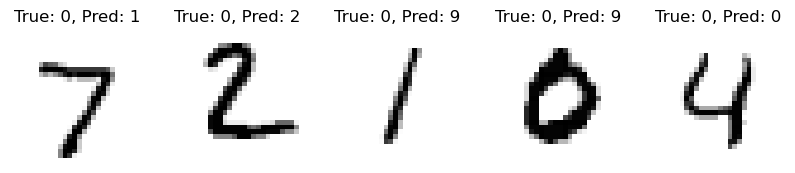

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def plot_predictions(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(f"True: {np.argmax(labels[i])}, Pred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

plot_predictions(x_val_data, y_val_data, Make_predictions, num_images=5)

In [27]:
dataset_val

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int64, name=None))>

# Exercise 4 : Forward Propagation Calculation

In this exercise, you will manually compute the forward propagation of a simple neural network that predicts house prices based on:

   - Square Footage (x₁)
   - Number of Bedrooms (x₂)

We will calculate the output using the following given values:

Input Values:\
    x₁ = 2000 (Square Footage)\
    x₂ = 3 (Number of Bedrooms)\
Initial Weights:\
    w₁ = 0.5 (Weight for Square Footage)\
    w₂ = 0.7 (Weight for Bedrooms)\
Bias: b = 50,000\
Activation Function: ReLU (Rectified Linear Unit)

   1. Calculate the output value “z” before activation.
   2. Apply the ReLU function to compute the final prediction.
   3. Interpret the result: What is the predicted house price?
----------------

In [20]:
x1 = 2000
x2 = 3
w1 = 0.5
w2 = 0.7
b = 50000

In [21]:
z = x1*w1 + x2*w2 + b
print(z)

51002.1


In [22]:
max(0,z)

51002.1

The predicted house price is $51002.1

### Exercise 5 : Implementing Forward and Backward Propagation in Python

You will code a simple neural network that performs forward propagation and backpropagation for a regression problem (predicting exam scores based on study hours).


   1. Run the code and observe how the weights and bias update.
   2. Explain why updating weights using gradient descent reduces the error.
   3. Modify the initial weights or learning rate and see how it affects learning.

_________________

In [23]:
import numpy as np

# Initialize input data (features)
x = np.array([4, 80])  # 4 hours studied, previous test score: 80

# Initialize weights and bias
w = np.array([0.6, 0.3])  # Initial weights
b = 10  # Initial bias

# Forward Propagation
def forward_propagation(x, w, b):
    z = np.dot(x, w) + b  # Weighted sum
    return z  # Linear activation (No ReLU here, it's a regression task)

# Compute prediction
y_pred = forward_propagation(x, w, b)
y_true = 85  # Actual exam score

# Compute Loss (Mean Squared Error)
loss = 0.5 * (y_true - y_pred) ** 2

# Compute Gradients
grad_w = -(y_true - y_pred) * x  # Partial derivatives with respect to weights
grad_b = -(y_true - y_pred)  # Partial derivative with respect to bias

# Update Weights and Bias
learning_rate = 0.01
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b

# Print Results
print("Initial Prediction:", y_pred)
print("Loss:", loss)
print("Updated Weights:", w_new)
print("Updated Bias:", b_new)


Initial Prediction: 36.4
Loss: 1180.98
Updated Weights: [ 2.544 39.18 ]
Updated Bias: 10.486


The weights were originally w1 = 0.6 and w2 = 0.3 and they changed to w1 = 2.544 and 39.18. The bias changed from 10 to 10.486.

Gradient descent is an optimization algorithm that adjusts the model's parameters (weights and bias) to minimize the loss function. By subtracting the gradients (scaled by the learning rate), it moves towards the minimum of the loss, reducing error with each iteration and gradually converging to the optimal parameters.

Now I will change the weights:

In [24]:
# Initialize input data (features)
x = np.array([4, 80])  # 4 hours studied, previous test score: 80

# Initialize weights and bias
w = np.array([2.5, 30])  # Initial weights
b = 10  # Initial bias

# Forward Propagation
def forward_propagation(x, w, b):
    z = np.dot(x, w) + b  # Weighted sum
    return z  # Linear activation (No ReLU here, it's a regression task)

# Compute prediction
y_pred = forward_propagation(x, w, b)
y_true = 85  # Actual exam score

# Compute Loss (Mean Squared Error)
loss = 0.5 * (y_true - y_pred) ** 2

# Compute Gradients
grad_w = -(y_true - y_pred) * x  # Partial derivatives with respect to weights
grad_b = -(y_true - y_pred)  # Partial derivative with respect to bias

# Update Weights and Bias
learning_rate = 0.01
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b

# Print Results
print("Initial Prediction:", y_pred)
print("Loss:", loss)
print("Updated Weights:", w_new)
print("Updated Bias:", b_new)

Initial Prediction: 2420.0
Loss: 2726112.5
Updated Weights: [  -90.9 -1838. ]
Updated Bias: -13.350000000000001


Now the Weights changed to w1 = -90.9 and w2 = -1838 and the bias to -13.35!